In [2]:
using BenchmarkTools
using Plotly
using Random
using StatsBase

In [3]:
Random.seed!(20121020)

;

In [5]:
layout = Layout(autosize = false)

style = Style(layout = layout)

use_style!(style)

;

In [6]:
function cumulate_sum_reverse(v::Vector)

    return reverse(cumsum(Iterators.reverse(v)))

end

;

In [7]:
element_ = string.(Array('A':'Z'))

n_element = length(element_)

element_score_ = randn(n_element)

;

In [8]:
set_element_ = sample(element_, 3; replace = false)

set_element_ = string.(collect("KWAT"))

;

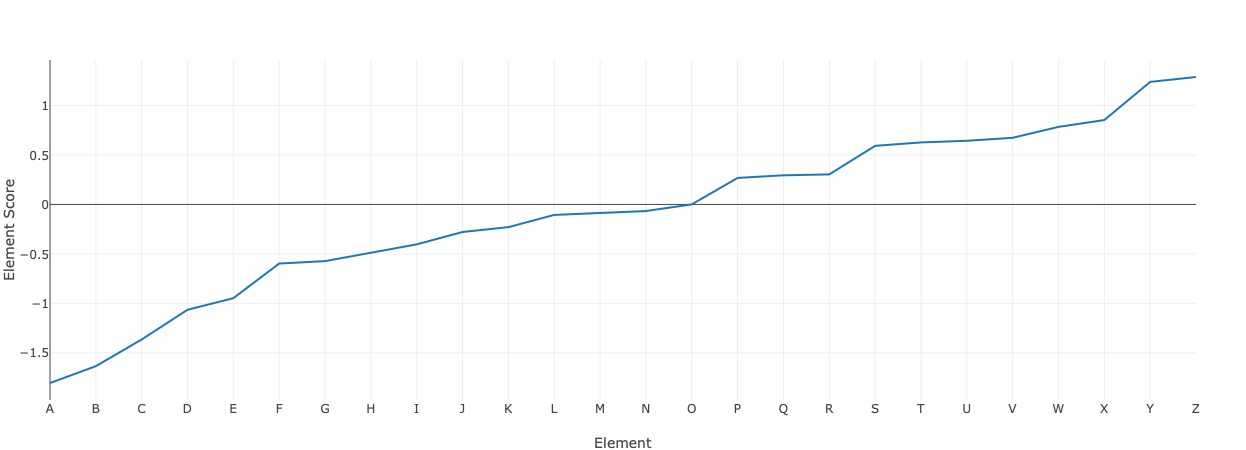

In [9]:
sort_index_ = sortperm(element_score_)

element_score_ = element_score_[sort_index_]

# element_ = element_[sort_index_]

xaxis = attr(title = "Element", tickvals = 0:n_element, ticktext = element_)

plot([scatter(y = element_score_)], Layout(yaxis_title = "Element Score", xaxis = xaxis))

## Is

In [10]:
set_element_to_nothing = Dict(set_element => nothing for set_element in set_element_)

Dict{String,Nothing} with 4 entries:
  "A" => nothing
  "W" => nothing
  "T" => nothing
  "K" => nothing

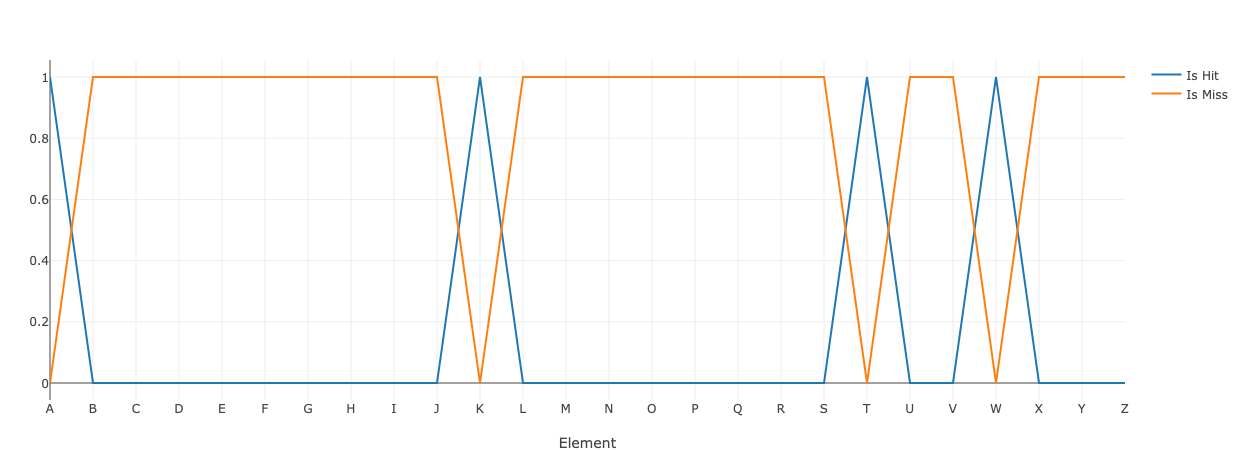

In [28]:
is_h = [haskey(set_element_to_nothing, element) for element in element_]

is_h = convert(Vector{Float64}, is_h)

is_m = 1 .- is_h

plot(
    [scatter(name = "Is Hit", y = is_h), scatter(name = "Is Miss", y = is_m)],
    Layout(xaxis = xaxis),
)

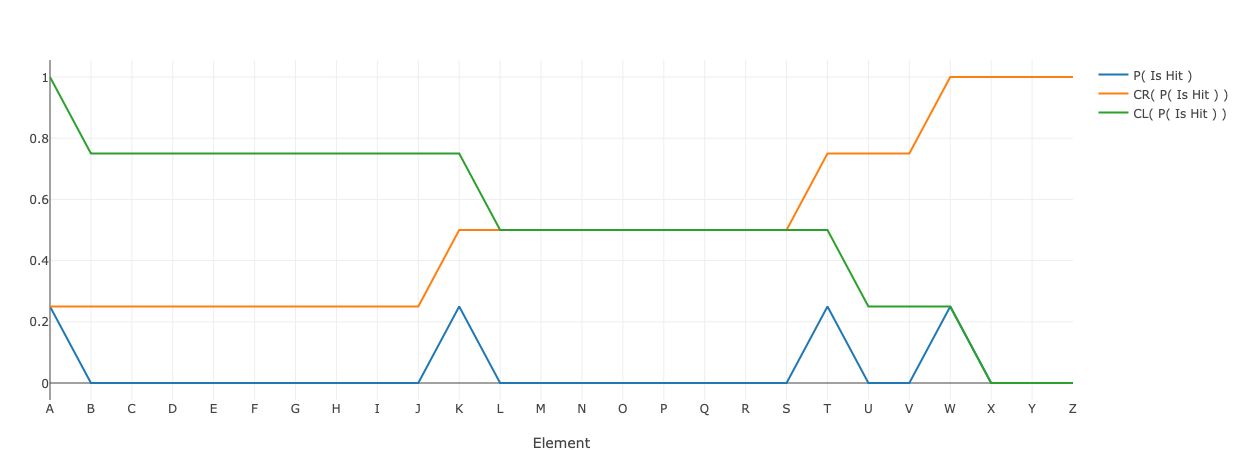

In [29]:
is_h_p = is_h / sum(is_h)

is_h_p_cr = cumsum(is_h_p)

is_h_p_cl = cumulate_sum_reverse(is_h_p)

plot(
    [
        scatter(name = "P( Is Hit )", y = is_h_p),
        scatter(name = "CR( P( Is Hit ) )", y = is_h_p_cr),
        scatter(name = "CL( P( Is Hit ) )", y = is_h_p_cl),
    ],
    Layout(xaxis = xaxis),
)

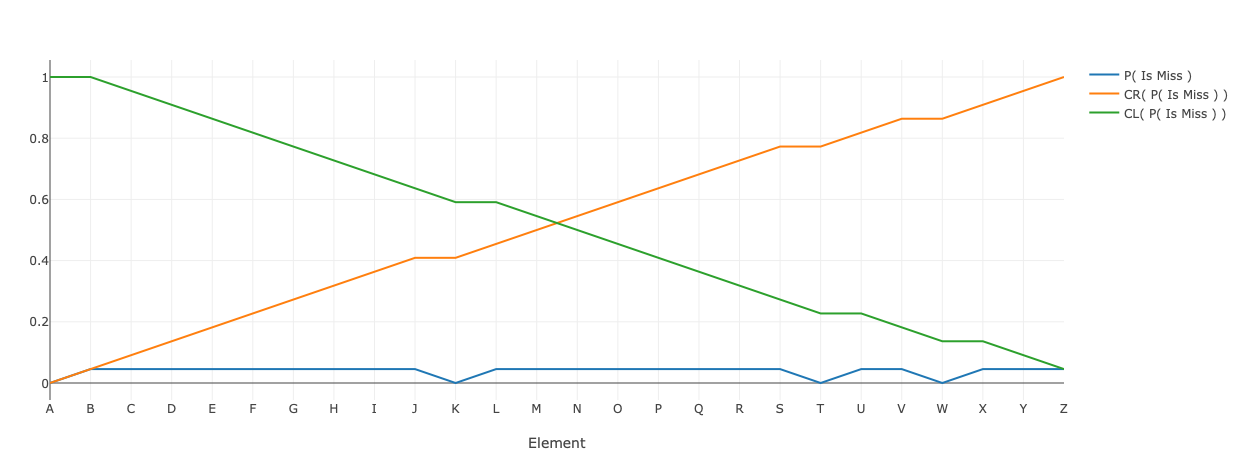

In [30]:
is_m_p = is_m / sum(is_m)

is_m_p_cr = cumsum(is_m_p)

is_m_p_cl = cumulate_sum_reverse(is_m_p)

plot(
    [
        scatter(name = "P( Is Miss )", y = is_m_p),
        scatter(name = "CR( P( Is Miss ) )", y = is_m_p_cr),
        scatter(name = "CL( P( Is Miss ) )", y = is_m_p_cl),
    ],
    Layout(xaxis = xaxis),
)

## Amplitutde

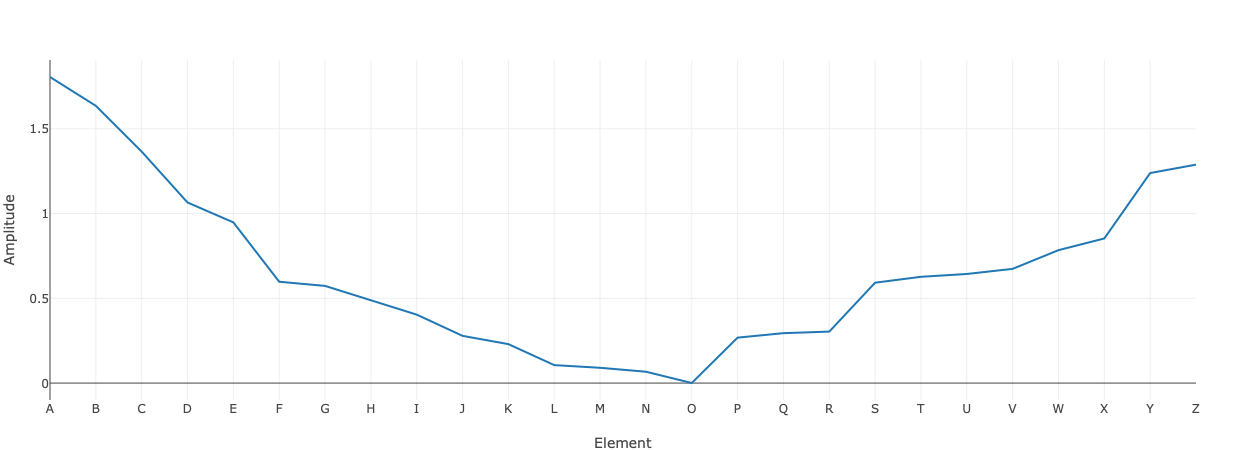

In [31]:
a = abs.(element_score_)

plot([scatter(y = a)], Layout(yaxis_title = "Amplitude", xaxis = xaxis))

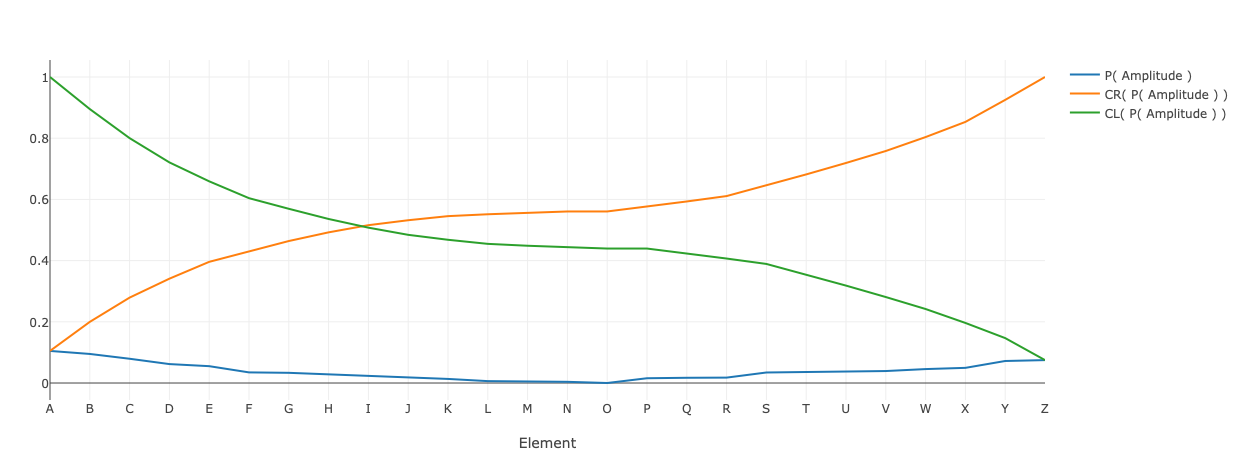

In [33]:
a_p = a / sum(a)

a_p_cr = cumsum(a_p)

a_p_cl = cumulate_sum_reverse(a_p)

plot(
    [
        scatter(name = "P( Amplitude )", y = a_p),
        scatter(name = "CR( P( Amplitude ) )", y = a_p_cr),
        scatter(name = "CL( P( Amplitude ) )", y = a_p_cl),
    ],
    Layout(xaxis = xaxis),
)

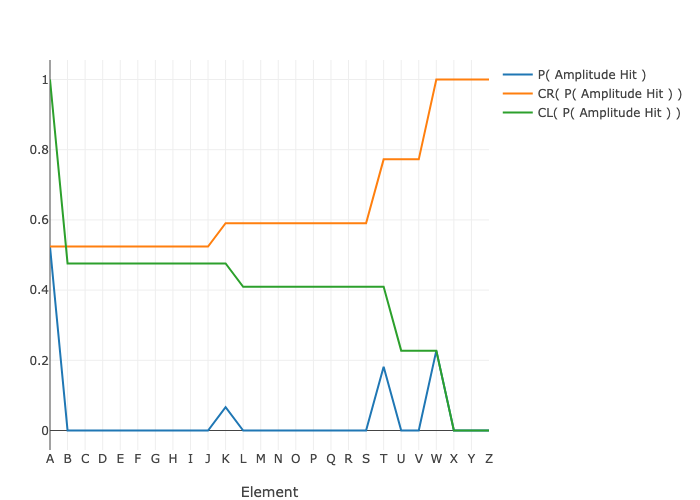

In [34]:
a_h = is_h .* a

a_h_p = a_h / sum(a_h)

a_h_p_cr = cumsum(a_h_p)

a_h_p_cl = cumulate_sum_reverse(a_h_p)

plot(
    [
        scatter(name = "P( Amplitude Hit )", y = a_h_p),
        scatter(name = "CR( P( Amplitude Hit ) )", y = a_h_p_cr),
        scatter(name = "CL( P( Amplitude Hit ) )", y = a_h_p_cl),
    ],
    Layout(xaxis = xaxis),
)

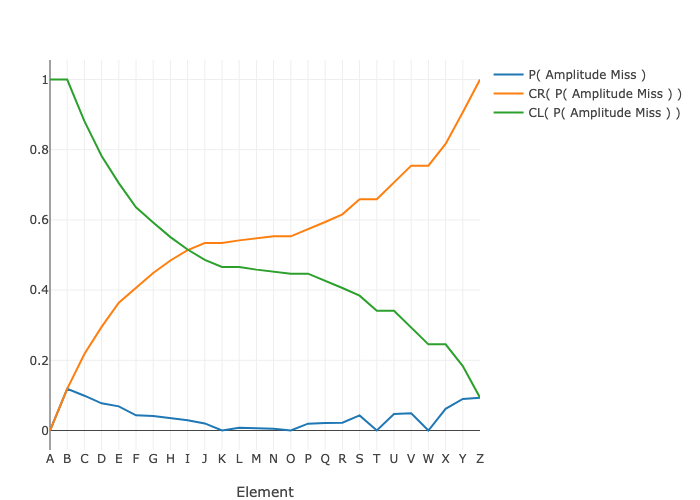

In [35]:
a_m = is_m .* a

a_m_p = a_m / sum(a_m)

a_m_p_cr = cumsum(a_m_p)

a_m_p_cl = cumulate_sum_reverse(a_m_p)

plot(
    [
        scatter(name = "P( Amplitude Miss )", y = a_m_p),
        scatter(name = "CR( P( Amplitude Miss ) )", y = a_m_p_cr),
        scatter(name = "CL( P( Amplitude Miss ) )", y = a_m_p_cl),
    ],
    Layout(xaxis = xaxis),
)

## KS

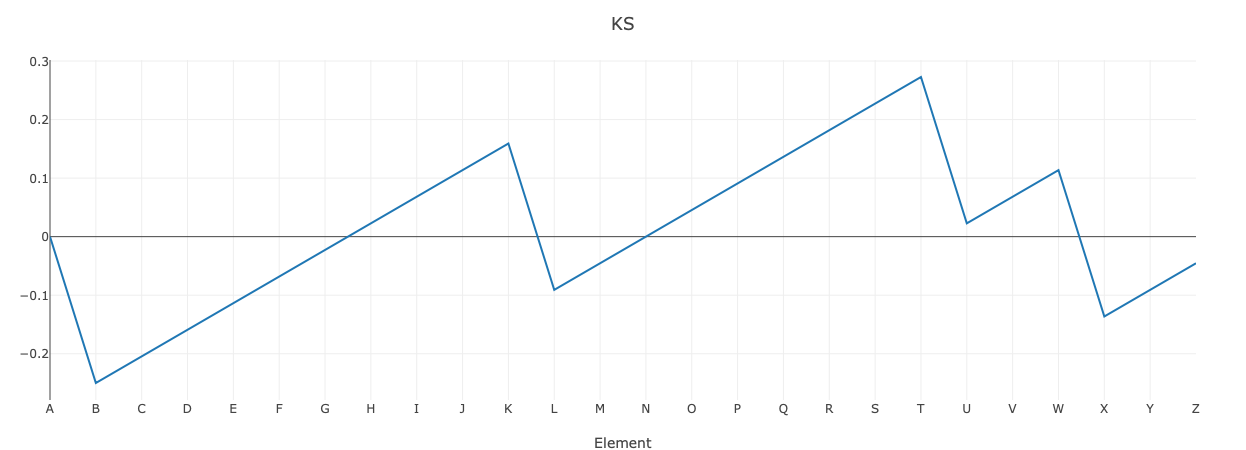

In [36]:
s = is_h_p_cl - is_m_p_cl

plot([scatter(y = s)], Layout(title = "KS", xaxis = xaxis))

## JSD

In [38]:
s = JSD(a_h_p_cl, a_m_p_cl, a_p_cl) - JSD(a_h_p_cr, a_m_p_cr, a_p_cr)

LoadError: UndefVarError: JSD not defined

## Score

In [39]:
score = sum(s) / length(s)

0.01136363636363641